## xgboost
### Overview
* xgboost method using gradient boosting 
  * ensemble learning combined with decision trees
* repeat learning to reduce errors while building models 
* final output is determined by ensembling the multiple models

### Pros
* accurate than random forests
* GBDT (include xgboost, lightgbm) can handle missing values!

### Cons
* slow learning
  * LightBGM overcomes this disadvantage
* parameters need to be tuned

In [ ]:
import pandas as pd
from sklearn.datasets import load_iris

iris = load_iris()
iris_x = pd.DataFrame(iris.data, columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
display(iris_x)
iris_y = pd.Series(iris.target)
display(iris_y)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Length: 150, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(iris_x, iris_y, test_size=0.3, shuffle=True) # hold-out

In [ ]:
import xgboost as xgb

clf = xgb.XGBClassifier()

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate, StratifiedKFold

skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)

# train
clf_cv = GridSearchCV(estimator=clf, param_grid={'max_depth': [2,4,6], 'n_estimators': [50,100,200]}, cv=skf, verbose=1)
clf_cv.fit(train_x, train_y.values)

print(f'clf_cv.best_params_: {clf_cv.best_params_}')
print(f'clf_cv.best_score_: {clf_cv.best_score_}')

# re-train using best parameters
clf = xgb.XGBClassifier(**clf_cv.best_params_)
clf.fit(train_x, train_y.values)

Fitting 3 folds for each of 9 candidates, totalling 27 fits
clf_cv.best_params_: {'max_depth': 2, 'n_estimators': 50}
clf_cv.best_score_: 0.9238095238095237


XGBClassifier(max_depth=2, n_estimators=50, objective='multi:softprob')

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

pred = clf.predict(test_x) # probability check: clf.predict_proba(test_x)

print(confusion_matrix(test_y, pred))
print(classification_report(test_y.values, pred))

[[16  0  0]
 [ 0 14  0]
 [ 0  0 15]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        15

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



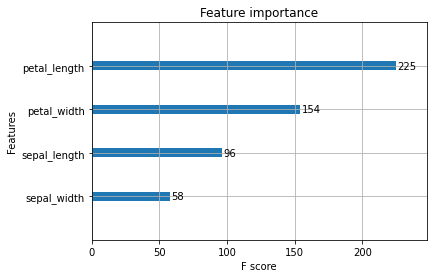

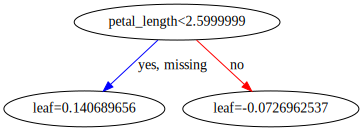

In [ ]:
import matplotlib.pyplot as plt

xgb.plot_importance(clf)
plt.show()

xgb.to_graphviz(clf)